<a href="https://colab.research.google.com/github/NajdAlqabbani/ML-CourseProject/blob/main/MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

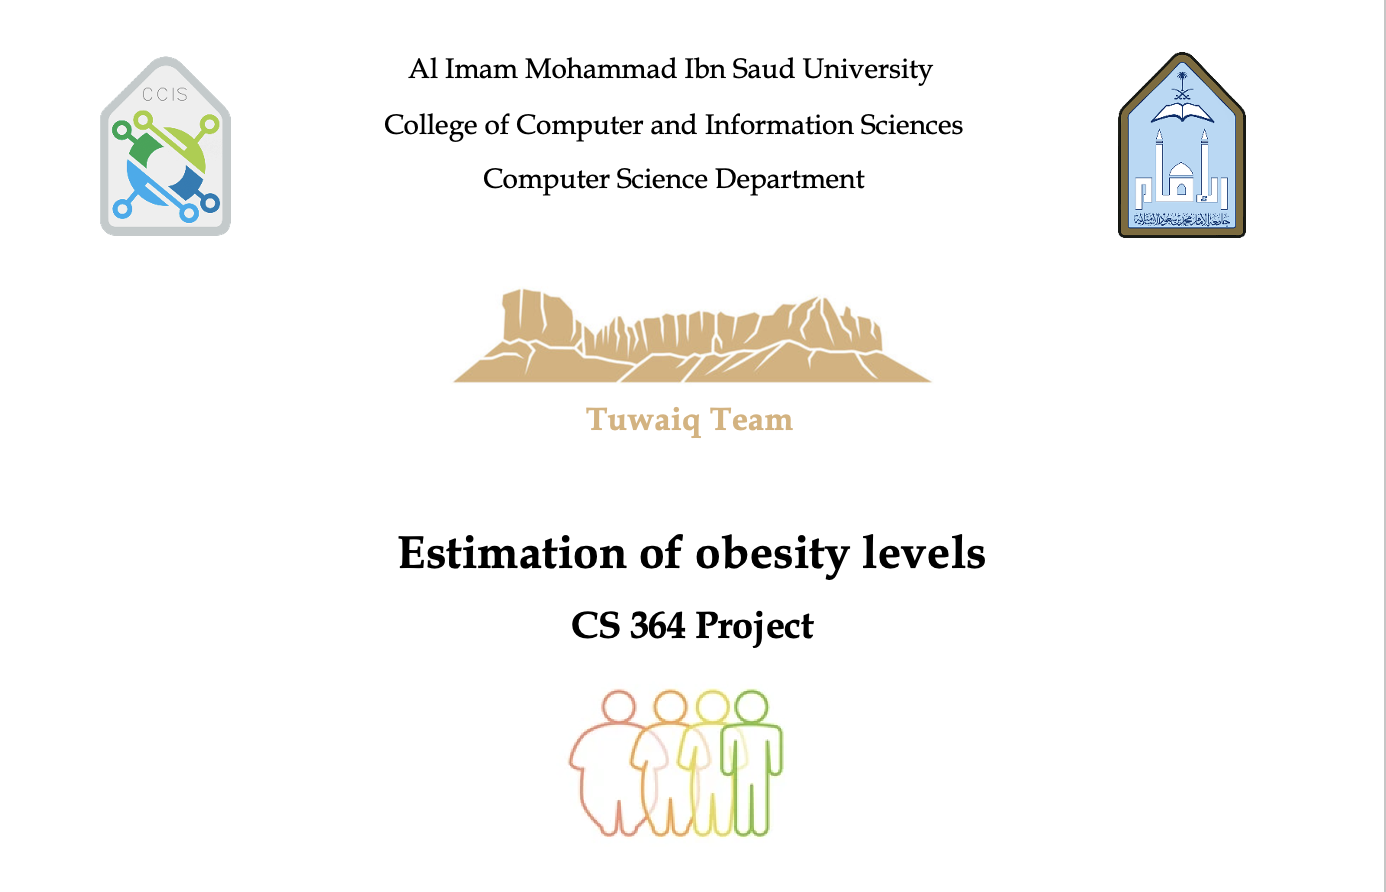

| Student name || Student ID |
| :-: || :-: |
| Rawan Saad Alabulkarim || 441020373  |
| Najd Mohammed Alqabbani|| 441018153|
| Muneera Fahad Almuhareb || 441019039 |

#Table Of Contents
1. Introduction
2. Prepare dataset<br>
    2.1. Import dataset <br>
    2.2. Split dataset<br>
    2.3. Convert text features into numeric<br>
3. Feature selection<br>
    3.1. Without feature selection<br>
    <ol>3.1.1. Hyperparameter Tuning<br></ol>
    3.2.  With feature selection<br>
    <ol> 3.2.1. Hyperparameter Tuning<br></ol>
4. Conclusion <br>     
5. References<br>

<h1> 1. Introduction </h1>
Our project is about the obesity level estimation of people based on their eating habits and physical condition. The obesity dataset is from Kaggle [1]. This dataset contains obesity records that were collected from individuals in Colombia, Peru and Mexico. In this project, we implemented the Random Forest model and trained it using this dataset. In this Google colab, we will highly focus on discussing the model implementation as a code with comments in detail. Other aspects of the project, such as dataset explanation and results with discussion, are documented in the attached report file.

<h1>2. Prepare dataset</h1>
We load the dataset from the "datasetML.xlsx" file attached to this Google colab. we remove the less important feature to reduce the complexity, by splitting the dataset into two part , first part contains the attributes while the second part contains the target. lastly , we perform the hayperparameter optimization using Grid Search and Cross-Validation.


<h1> 2.1. Import dataset </h1>
First step is to get the obesity dataset from the external excel file by reading its content using <b> pandas </b> library then print a small piece of the dataset content[2].

In [ ]:
# get the dataset from the "ObesityDataset" excel file
import pandas as pd
dataset = pd.read_excel("datasetML.xlsx")

# print small piece of the dataset content
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Which consists of <b> 16 features and 1 target(columns)</b> and <b> 2111 records (rows)</b>.

In [ ]:
# number of columns and rows
print("(rows , columns)")
dataset.shape

(rows , columns)


(2111, 17)

<b>Important notice :</b> this dataset does not contain any null values, we check that form the code below .

In [ ]:
print(dataset .isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


<h1> 2.2. Split dataset </h1>
We must split the dataset into two parts before building the <b> Classification Random Forest </b> model.<br> capital <b>X</b> : represents all the columns needed for classification, which indicated to all columns except for the target column (NObeyesdad).<br> small <b>y</b> : represen the column used for prediction, which is the target colums(NObeyesdad)[2].

In [ ]:
# copy all columns in X except for the target column

X = pd.DataFrame(dataset.iloc[:,:-1])

# print small piece of dataset to ensure the data is correct
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


After adjusting the required columns data in the <b>X</b> variable, then we adjust the target column data into <b>y</b> variable.

In [ ]:
# copy the target column only and store it in "y"

y = pd.DataFrame(dataset.iloc[:,-1])

# print small piece of dataset target to ensure the data is correct
y.head()

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II


<h1> 2.3. Convert text features into numeric </h1>
In this dataset, there are two types of features which are <b> text </b> and <b> numeric </b> , listed as follows:

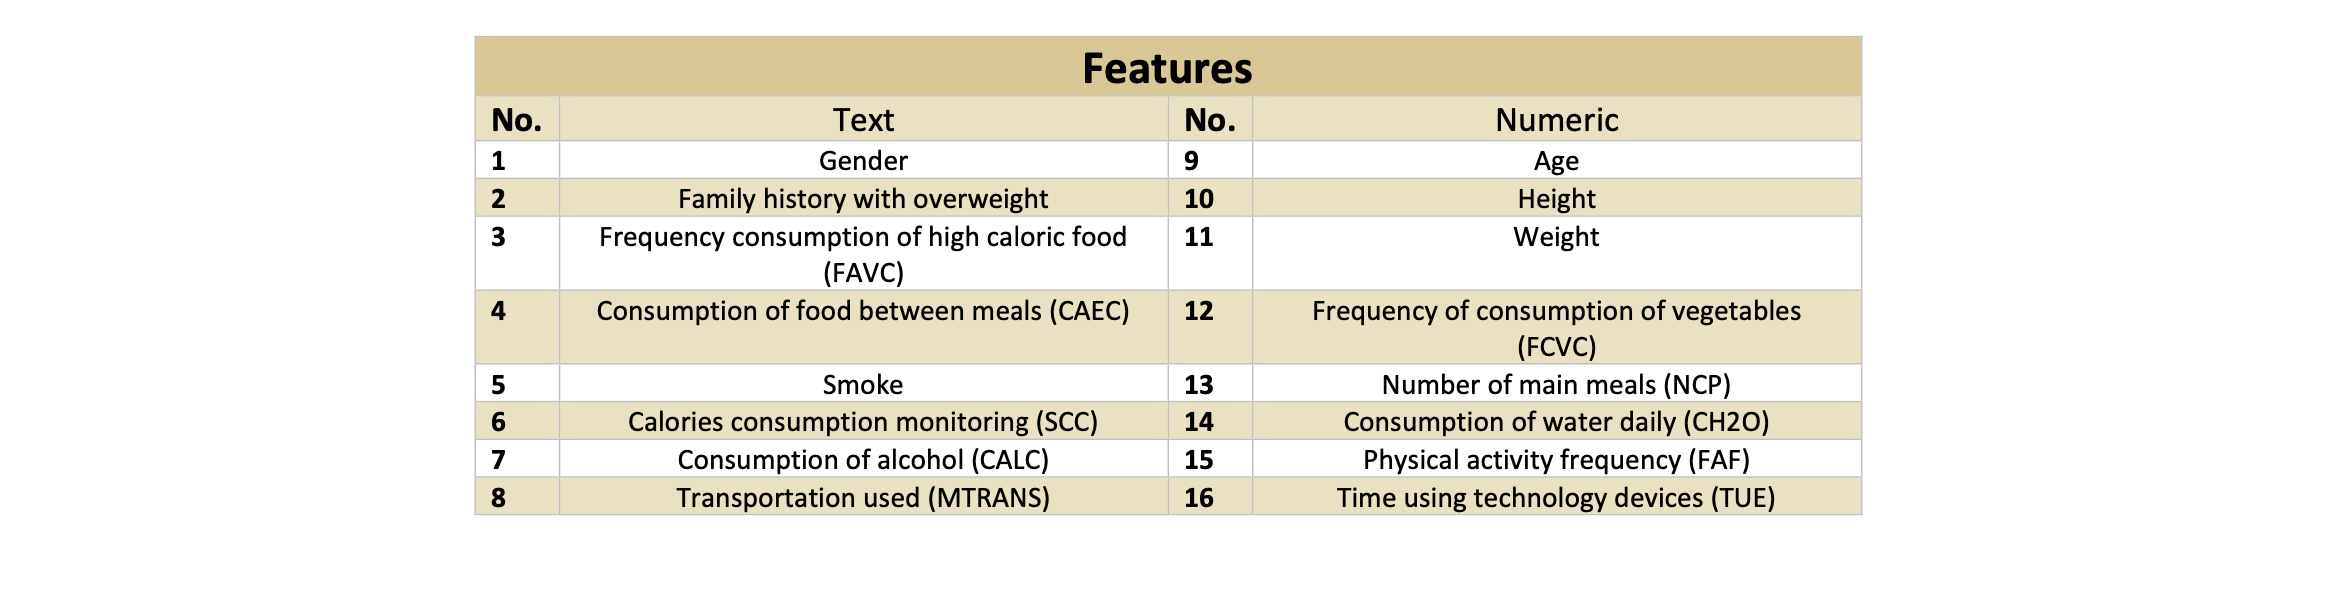

The <b> <i>sklearn </i></b> library can <b>NOT</b> handle the text data type. therefore, we must convert all the features that consists of text into thier corresponding numeric values. The 8 text features' values will be converted as follows: <br><br>
<b>Gender:</b> convert { female , male } into { 0, 1 }. <br>
<b>FAVC:</b> convert from { yes, no } into { 0, 1 }</br>
<b>SMOKE:</b> convert from { yes, no} into { 0, 1 }</br>
<b>SCC:</b> convert from { yes, no} into { 0, 1 }</br>
<b>family_history_with_overweight: </b>  convert { yes, no } into { 0, 1 }</br>
<b>CAEC:</b> convert from { Always, Frequently, Sometimes, no } into { 0, 1, 2, 3 }</br>
<b>CALC:</b> convert from { Always, Frequently, Sometimes, no } into { 0, 1, 2, 3 }</br>
<b>MTRANS:</b> convert from { Public_Transportation, Automobile, Motorbike, Walking, Bike} into { 0, 1, 2, 3,4 }</br>

The original source code is from this reference [3].

In [ ]:
# convert text features into numeric by replacing text (object) variables with numbers

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = X.columns.tolist()
for column in cols:
    if X[column].dtype =='object':
        X[column] = le.fit_transform(X[column])

X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


<h1>3. Feature selection </h1>
To reduce the complexity of the computations in the Random Forest model, we used the <b> select features </b>mechanism to reduce the number of features by removing the unsignificant features using <b> <i>SelectFromModel </i> </b> function provided by sklearn.We implemented the model with and without feature selection to ensure that the accuracy is <B>very similar</B>. Therefore , we used the model with select feature to reduce complexity of the computations and the size of the model[1].

In [ ]:
# import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

We import the required libraries, and we will reduce the complexity of the model and make the training process faster by selecting the most significant features that rely on for prediction.

The most common approach to split the dataset is into <b> training (70%) </b> and <b> testing (30%) </b> based on that approach we split datasset.

In [ ]:
# Split dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

To set the differences between results of the dataset <B>with</B> and <B>without</B> feature selection.

<h1> 3.1. Without feature selection </h1>







<ipython-input-9-f0fd55f53ae8>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


Training Accuracy is : 100.0000 %
Tetsing Accuracy is : 95.4259 %


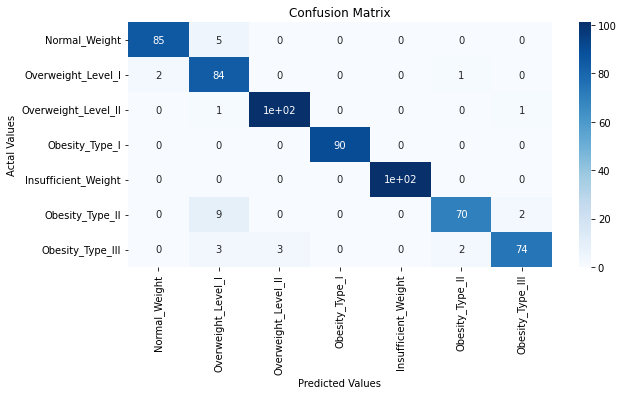

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.94      0.96        90
      Normal_Weight       0.82      0.97      0.89        87
     Obesity_Type_I       0.97      0.98      0.98       103
    Obesity_Type_II       1.00      1.00      1.00        90
   Obesity_Type_III       1.00      1.00      1.00       101
 Overweight_Level_I       0.96      0.86      0.91        81
Overweight_Level_II       0.96      0.90      0.93        82

           accuracy                           0.95       634
          macro avg       0.96      0.95      0.95       634
       weighted avg       0.96      0.95      0.95       634



In [ ]:
# Create a randomforest Classifier
rf=RandomForestClassifier()

# Train the model using the training sets
rf.fit(X_train,y_train)

# prediction on test set
y_pred=rf.predict(X_test)

# print the training accuracy
print(f'Training Accuracy is : {(rf.score(X_train,y_train)) *100:.4f} %')

# print the testing accuracy
print(f'Tetsing Accuracy is : {(rf.score(X_test,y_test)) *100:.4f} %')

# Creating a confusion matrix,which compares the y_test and y_pred
cm=confusion_matrix(y_test, y_pred) #[4]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting
cm_df = pd.DataFrame(cm,
                     index = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'],
                     columns = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'])

# Plotting the confusion matrix
plt.figure(figsize=(9.5,4.5))
sns.heatmap(cm_df,cmap="Blues",annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# View the classification report for test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#[5]

 <h1> 3.1.1. Hyperparameter Tuning </h1>

 We will perform hyperparameter tuning, which is choosing the best parameters to enhance the performance and avoid overfitting. We used the <b> GridSearchCV </b>technique, which considers all the combinations of the candidates in finding the best parameters.The code of the GridSearchCV is from this reference [6].

Prepare parameters values to be used in the GridSearchCV process and the values chosen are random.

In [ ]:
# parameters values
criterion = ['gini', 'entropy']
max_features = ['auto','sqrt']
max_depth = [1,3,6]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

Then, create a <b> Grid </b>object by inserting the parameters with thier values.

In [ ]:
# create the param grid
param_grid = {'criterion' : criterion,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap,
             }

We will start the <b>GridSearchCV </b> process, we applied the <b>3-Fold Cross-Validation </b>, because we have tried multiple k values and they gave similar values and larger k values result in a large number of instances which increases the time complexity and the CPU estimation. Hence, using k=3 gave a good performance in an acceptable time. This process may require time up to one or two minuets to finish.[6]

In [ ]:
# create GridSearchCV object with k = 3
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose = 2, n_jobs = 4)#[7]
rf_Grid.fit(X_train, y_train)

NameError: ignored

After finishing the process, print the <b>best chosen parameters </b>, which are the parameters to be used in building random forest model.

In [ ]:
# print the best chosen parameters
rf_Grid.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

We will implement the <b>Random Forest</b> model without applying the feature selection and GridSearchCV.

In [ ]:
# create a Random Forest classifier with adjusting hyperparameters
rf=RandomForestClassifier(bootstrap= False , criterion = 'entropy', max_depth= 6, max_features ='sqrt',
                          min_samples_leaf=2, min_samples_split=2 )

# train the model
rf.fit(X_train,y_train)
# prediction on test set
y_pred=rf.predict(X_test)

<ipython-input-22-8024d883485a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


We show the performance of the implemeneted model acording to <b>accuracy </b>and <b>confusion matrix</b>[4].

Training Accuracy is : 96.7502 %
Tetsing Accuracy is : 91.7981 %


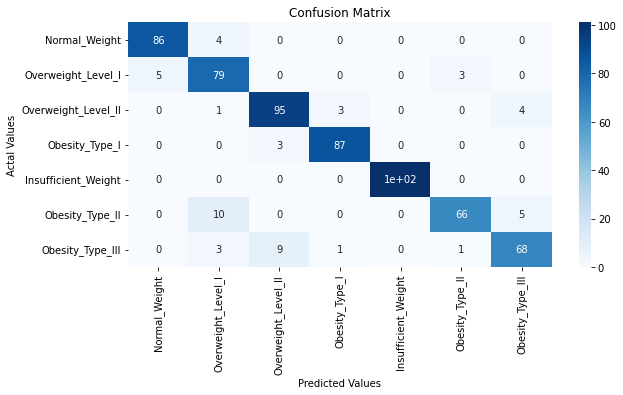

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.96      0.95        90
      Normal_Weight       0.81      0.91      0.86        87
     Obesity_Type_I       0.89      0.92      0.90       103
    Obesity_Type_II       0.96      0.97      0.96        90
   Obesity_Type_III       1.00      1.00      1.00       101
 Overweight_Level_I       0.94      0.81      0.87        81
Overweight_Level_II       0.88      0.83      0.86        82

           accuracy                           0.92       634
          macro avg       0.92      0.91      0.91       634
       weighted avg       0.92      0.92      0.92       634



In [ ]:
# print the training accuracy
print(f'Training Accuracy is : {(rf.score(X_train,y_train)) *100:.4f} %')

# print the testing accuracy
print(f'Tetsing Accuracy is : {(rf.score(X_test,y_test)) *100:.4f} %')
cm=confusion_matrix(y_test, y_pred)#[4]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'],
                     columns = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'])

# Plotting the confusion matrix
plt.figure(figsize=(9.5,4.5))
sns.heatmap(cm_df,cmap="Blues",annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# View the classification report for test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#[5]

<h1> 3.2. With feature selection </h1>

Start the selection process by creating a selection Random Forest object and train it into our data. The original code used to implement the feature selection is from this reference  [1].

In [ ]:
# use SelectFromModel to select the important features
rf_select = SelectFromModel(RandomForestClassifier())

# train the model
rf_select.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier())

In this step, we <b>extract the important features </b>and visualize the importance of features in the figure bellow.

In [ ]:
# extract the important features
feature_imp = pd.Series(rf.feature_importances_,index=['Gender','Age','Height','Weight','family_history_with_overweight',
                                                       'CAEC','FAVC', 'FCVC', 'NCP','SMOKE','CH2O','SCC','FAF', 'TUE','CALC','MTRANS']).sort_values(ascending=False)

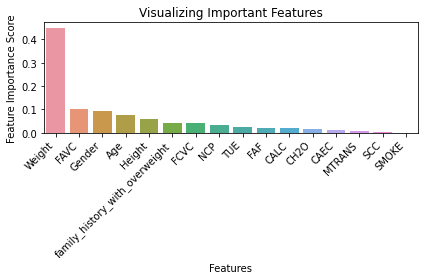

In [ ]:
# visulize the feature importance
%matplotlib inline

# Add labels to a graph
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")

# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)#[8]
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

After the results shown to us so far, it becomes clear that the highest effective feature is<b> weight</b>, as it is relied upon to a large extent in training and prediction.

In [ ]:
# select the important features
selected_feat = X_train.columns[(rf_select.get_support())]#[9]
no_selected_features = len(selected_feat)

# print the selected features
print ("number of selected features is (" + str(no_selected_features) + ") features")
print ("\nthe selected features are :")
i = 0
while i < no_selected_features:
    print(selected_feat[i])
    i = i +1

number of selected features is (4) features

the selected features are :
Age
Height
Weight
FCVC


The selected features are: <b>Weight, Height, Age, FCVC </b>, we conceder that the data is limited to these features only.

In [ ]:
X=X[['Age', 'Height', 'Weight', 'FCVC']]

And now we will print the results to map the differences between performance before and after the <b>feature selection</b> process. After the feature selection has been made we will bulid the model again which will be used in further steps.

In [ ]:
# Split dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<ipython-input-31-a88cc23dd797>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


Training Accuracy is : 100.0000 %
Tetsing Accuracy is : 95.8991 %


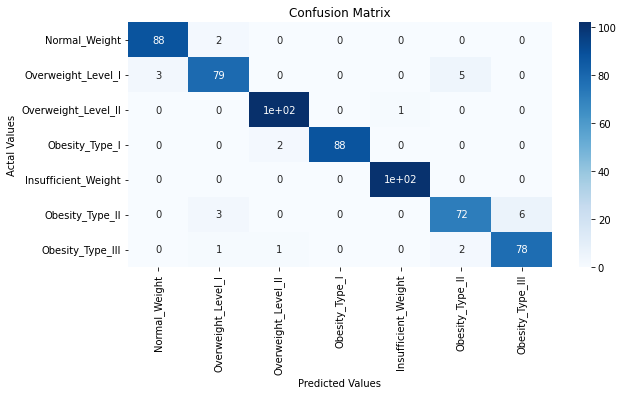

                     precision    recall  f1-score   support

Insufficient_Weight       0.97      0.98      0.97        90
      Normal_Weight       0.93      0.91      0.92        87
     Obesity_Type_I       0.97      0.99      0.98       103
    Obesity_Type_II       1.00      0.98      0.99        90
   Obesity_Type_III       0.99      1.00      1.00       101
 Overweight_Level_I       0.91      0.89      0.90        81
Overweight_Level_II       0.93      0.95      0.94        82

           accuracy                           0.96       634
          macro avg       0.96      0.96      0.96       634
       weighted avg       0.96      0.96      0.96       634



In [ ]:
#Create a randomforest Classifier
rf=RandomForestClassifier()

#Train the model using the training sets
rf.fit(X_train,y_train)

# prediction on test set
y_pred=rf.predict(X_test)

# print the training accuracy
print(f'Training Accuracy is : { (rf.score(X_train,y_train)) * 100:.4f} %')

# print the testing accuracy
print(f'Tetsing Accuracy is : { (rf.score(X_test,y_test)) * 100:.4f} %')


# Creating  a confusion matrix,which compares the y_test and y_pred
cm=confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'],
                     columns = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'])

#Plotting the confusion matrix
plt.figure(figsize=(9.5,4.5))
sns.heatmap(cm_df,cmap="Blues",annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# View the classification report for test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#[5]

<h1> 3.2.1. Hyperparameter Tuning</h1>

 We will perform hyperparameter tuning, which is choosing the best parameters to enhance the performance and avoid overfitting. This technique would take a long time if the number of parameters is large. Hence, we took advantage of applying the feature selection, which will reduce the time complexity of the method[6].

In [ ]:
# create GridSearchCV object with k = 3
rf_Grid.fit(X_train, y_train)

# print the best chosen parameters
rf_Grid.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

<ipython-input-35-dad287d1dfad>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


Training Accuracy is : 95.5315 %
Tetsing Accuracy is : 91.3249 %


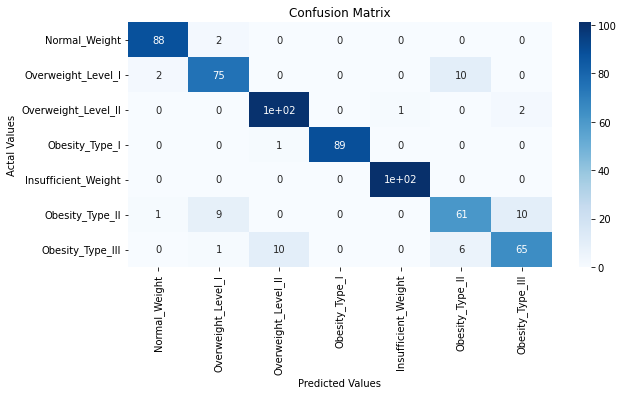

                     precision    recall  f1-score   support

Insufficient_Weight       0.97      0.98      0.97        90
      Normal_Weight       0.86      0.86      0.86        87
     Obesity_Type_I       0.90      0.97      0.93       103
    Obesity_Type_II       1.00      0.99      0.99        90
   Obesity_Type_III       0.99      1.00      1.00       101
 Overweight_Level_I       0.79      0.75      0.77        81
Overweight_Level_II       0.84      0.79      0.82        82

           accuracy                           0.91       634
          macro avg       0.91      0.91      0.91       634
       weighted avg       0.91      0.91      0.91       634



In [ ]:
# create a Random Forest classifier with adjusting hyperparameters
rf=RandomForestClassifier(bootstrap= True, criterion = 'entropy', max_depth= 6, max_features ='auto',
                          min_samples_leaf=1, min_samples_split=2 )

# train the model
rf.fit(X_train,y_train)
# prediction on test set
y_pred=rf.predict(X_test)

# print the training accuracy
print(f'Training Accuracy is : { (rf.score(X_train,y_train)) * 100:.4f} %')

# print the testing accuracy
print(f'Tetsing Accuracy is : { (rf.score(X_test,y_test)) * 100:.4f} %')


# Creating  a confusion matrix,which compares the y_test and y_pred
cm=confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'],
                     columns = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'])

#Plotting the confusion matrix
plt.figure(figsize=(9.5,4.5))
sns.heatmap(cm_df,cmap="Blues",annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# View the classification report for test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#[5]

<h1>4. Conclusion </h1>

The primary goal of implementing <b>gridsearcgCV with feature selection</b> is to <b>decrease</b> the model's complexity. Instead of dealing with all of the <b>features</b> and creating a massive random forest model, using feature selection <b>minimizes</b> the size of the random forest and <b>speeds up </b>prediction. We execute the code several times and get <b>similar</b> results.

# 5. References
[1][Dataset from Kaggle](https://www.kaggle.com/datasets/jayitabhattacharyya/estimation-of-obesity-levels-uci-dataset)<br>
[2][Source Code](https://intellipaat.com/blog/what-is-random-forest-algorithm-in-python/)<br>

[3][Convert textual data into numeric ](https://youtu.be/OIkAx9OTjvA)<br>

[4][Confusion matrix ](https://youtu.be/98LX2iRWXsY)<br>
[5][Classification Report](https://medium.com/mlearning-ai/confusion-matrix-for-multiclass-classification-f25ed7173e66)<br>

[6][Hyperparameter tuning1](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)<br>
[7][Hyperparameter tuning2](https://youtu.be/c4mS7KaOIGY)<br>
[8][Barpolt](https://intellipaat.com/blog/what-is-random-forest-algorithm-in-python/)<br>
[9][Getsupport](https://youtu.be/CmemNQEbET4)<br>


